   ##                    Preprocessing Of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [3]:
data=pd.read_csv('data.csv')

In [4]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [7]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
data=data.drop(['date','street','statezip','country'],axis=1)

In [10]:
#data=data.drop(['waterfront'],axis=1)

In [11]:
#data['city']=pd.factorize(data['city'])[0]

In [6]:
from sklearn.decomposition import PCA
X = pd.get_dummies(data.city, prefix='City')
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
data['city_pca1'] = X_pca[:, 0]
data['city_pca2'] = X_pca[:, 1]

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [7]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
city_pca1        0
city_pca2        0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  city_pca1      4600 non-null   float64
 15  city_pca2      4600 non-null   float64
dtypes: float64(6), int64(9), object(1)
memory usage: 575.1+ KB


In [15]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'city_pca1', 'city_pca2'],
      dtype='object')

In [16]:
data.shape

(4600, 16)

In [9]:
data['bedrooms']  = data['bedrooms'].astype('int64')
data['floors']    = data['floors'].astype('int64')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   int64  
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  city_pca1      4600 non-null   float64
 15  city_pca2      4600 non-null   float64
dtypes: float64(4), int64(11), object(1)
memory usage: 575.1+ KB


## Exploratory Data Analysis

#### How Price is Distributed

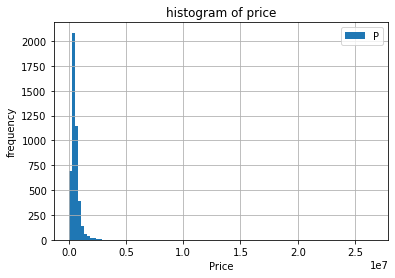

In [19]:
data['price'].hist(bins=100)
plt.xlabel("Price")
plt.ylabel("frequency")
plt.title("histogram of price")
plt.legend("Price")
plt.show()

### Removing rows based on outliers

In [10]:
(data['price'] > 0.3e7).sum()

9

In [21]:
#Q1 = data['price'].quantile(0.25)
#Q3 = data['price'].quantile(0.75)
#IQR = Q3 - Q1


In [22]:
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR


In [23]:
#outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]


In [11]:
data = data[~(data['price'] > 0.3e7)]

#### Distribution of price after removel of outliers

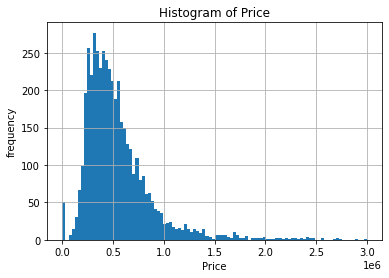

In [25]:
data['price'].hist(bins=100)
plt.xlabel('Price')
plt.ylabel('frequency')
plt.title('Histogram of Price')
plt.show()

In [26]:
bedrooms=data['bedrooms'].value_counts()
bedrooms

3    2030
4    1529
2     566
5     350
6      60
1      38
7      13
8       2
0       2
9       1
Name: bedrooms, dtype: int64

In [27]:
floors=data['floors'].value_counts()
floors

1    2614
2    1848
3     129
Name: floors, dtype: int64

In [12]:
(data['price']==0).sum()

49

In [13]:
data['price'].replace(0,np.nan,inplace=True)      #replacing 0's with nan

In [14]:
data.dropna(inplace=True)

In [31]:
#data['price'].fillna(value=data['price'].mean(),inplace=True)

In [32]:
#(data['waterfront']==0).sum()

In [33]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'city_pca1', 'city_pca2'],
      dtype='object')

In [15]:
duplicates = data[data.duplicated()]
duplicates

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,city_pca1,city_pca2


In [35]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
count,4.542000e+03,4542.000000,4542.000000,4542.000000,4.542000e+03,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000
mean,5.437057e+05,3.392118,2.151255,2124.428886,1.482228e+04,1.458829,0.006165,0.231616,3.448921,1817.153457,307.275429,1970.790841,808.402466,0.001219,0.000741
std,3.343186e+05,0.902008,0.769943,931.881656,3.599441e+04,0.552028,0.078282,0.760211,0.675107,843.027175,453.452628,29.759690,979.383266,0.488016,0.250880
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,-0.405058,-0.635350
25%,3.260000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,-0.357669,-0.021397
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.672500e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,-0.318007,-0.010160
75%,6.554438e+05,4.000000,2.500000,2610.000000,1.092675e+04,2.000000,0.000000,0.000000,4.000000,2297.500000,600.000000,1997.000000,1999.000000,0.675179,0.001898
max,3.000000e+06,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,9410.000000,4130.000000,2014.000000,2014.000000,0.675179,0.768963


In [36]:
data.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,city_pca1,city_pca2
0,3.130000e+05,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline,-0.334071,-0.014579
1,2.384000e+06,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,0.675179,0.001898
2,3.420000e+05,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,Kent,-0.356881,-0.023232
3,4.200000e+05,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue,-0.401545,-0.635350
4,5.500000e+05,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond,-0.377678,-0.044415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1,0,0,4,1510,0,1954,1979,Seattle,0.675179,0.001898
4596,5.343333e+05,3,2.50,1460,7573,2,0,0,3,1460,0,1983,2009,Bellevue,-0.401545,-0.635350
4597,4.169042e+05,3,2.50,3010,7014,2,0,0,3,3010,0,2009,0,Renton,-0.405058,0.768963
4598,2.034000e+05,4,2.00,2090,6630,1,0,0,3,1070,1020,1974,0,Seattle,0.675179,0.001898


In [16]:
data['price'].min()

7800.0

In [17]:
data['price'].max()

3000000.0

In [18]:
data['price'].mean()

543705.690659794

<AxesSubplot:xlabel='floors', ylabel='price'>

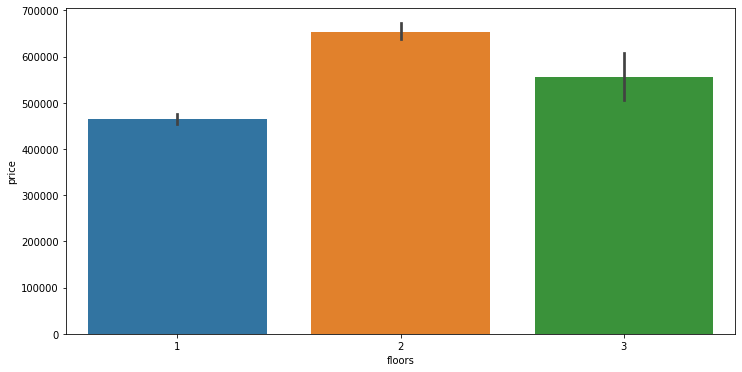

In [40]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['floors'],y=data['price'])

In [20]:
from scipy import stats

### With the help of Q-Q plot we see whether the terget variable is Normally Distributed or not, as Linear mostly like Normally Distributed Data.

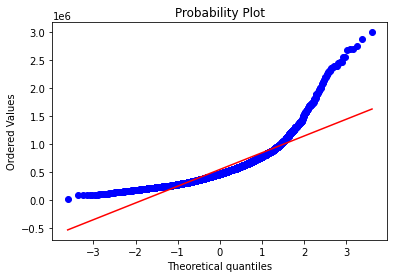

In [21]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)
plt.show()

### As the target variable (price) is very skewed, we apply log-transformation on target varibale to make it Normally Distributed

In [22]:
data['price'] = np.log1p(data['price'])

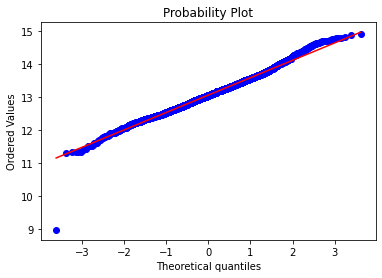

In [23]:
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)
plt.show()

C:\Users\ubaid\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

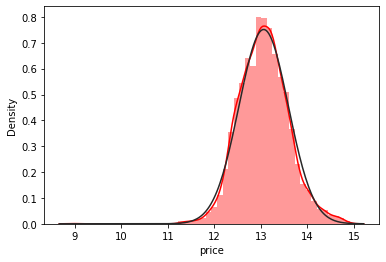

In [45]:
sns.distplot(data['price'],color="red",kde=True,fit=stats.norm)

In [46]:
corr=data.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city_pca1,city_pca2
price,1.000000,0.354535,0.546452,0.670317,0.086480,0.279441,0.124513,0.318396,0.058392,0.579586,0.300032,0.059694,-0.065820,0.091964,-0.240860
bedrooms,0.354535,1.000000,0.544793,0.597365,0.070888,0.152945,-0.015529,0.107100,0.020783,0.482455,0.330687,0.143257,-0.062425,-0.183864,-0.056559
bathrooms,0.546452,0.544793,1.000000,0.754789,0.109137,0.505442,0.041158,0.193432,-0.123564,0.684663,0.278276,0.469220,-0.222603,-0.184699,-0.071497
sqft_living,0.670317,0.597365,0.754789,1.000000,0.216472,0.343512,0.068646,0.294722,-0.065742,0.874157,0.429909,0.292820,-0.127802,-0.236730,-0.097056
sqft_lot,0.086480,0.070888,0.109137,0.216472,1.000000,-0.005216,0.016426,0.072312,0.000961,0.220485,0.034958,0.049108,-0.021360,-0.185925,-0.003385
floors,0.279441,0.152945,0.505442,0.343512,-0.005216,1.000000,0.010971,0.019580,-0.307004,0.519222,-0.259355,0.562422,-0.248269,-0.037950,0.020575
waterfront,0.124513,-0.015529,0.041158,0.068646,0.016426,0.010971,1.000000,0.342346,0.010126,0.047046,0.053609,-0.031397,0.009530,-0.030168,-0.011311
view,0.318396,0.107100,0.193432,0.294722,0.072312,0.019580,0.342346,1.000000,0.061245,0.162630,0.303327,-0.067378,0.025207,0.058365,-0.056441
condition,0.058392,0.020783,-0.123564,-0.065742,0.000961,-0.307004,0.010126,0.061245,1.000000,-0.180251,0.200005,-0.399214,-0.183811,0.073403,-0.034425
sqft_above,0.579586,0.482455,0.684663,0.874157,0.220485,0.519222,0.047046,0.162630,-0.180251,1.000000,-0.062666,0.413040,-0.164754,-0.329063,-0.053372


<AxesSubplot:>

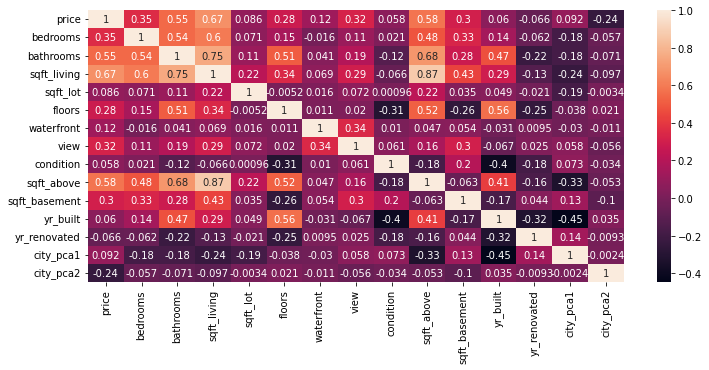

In [47]:
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot=True)

(array([ 79., 111.,  79.,  95., 171.,  92.,  38., 191., 189., 262., 252.,
        274., 281., 152., 365., 224., 359., 223., 353., 484., 268.]),
 array([1900.        , 1905.42857143, 1910.85714286, 1916.28571429,
        1921.71428571, 1927.14285714, 1932.57142857, 1938.        ,
        1943.42857143, 1948.85714286, 1954.28571429, 1959.71428571,
        1965.14285714, 1970.57142857, 1976.        , 1981.42857143,
        1986.85714286, 1992.28571429, 1997.71428571, 2003.14285714,
        2008.57142857, 2014.        ]),
 <BarContainer object of 21 artists>)

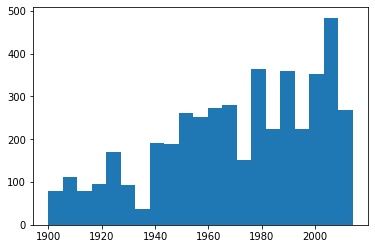

In [48]:
plt.hist(data['yr_built'],bins='auto',linewidth=0.5)

In [49]:
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,city_pca1,city_pca2
0,12.653962,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,Shoreline,-0.334071,-0.014579
1,14.684291,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,Seattle,0.675179,0.001898
2,12.742569,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,Kent,-0.356881,-0.023232
3,12.948012,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,Bellevue,-0.401545,-0.635350
4,13.217675,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,Redmond,-0.377678,-0.044415


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'city_pca1'}>,
        <AxesSubplot:title={'center':'city_pca2'}>, <AxesSubplot:>]],
      dtype=object)

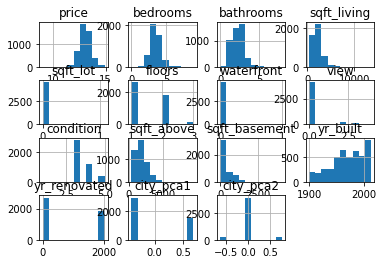

In [50]:
data.hist()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4542 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4542 non-null   float64
 1   bedrooms       4542 non-null   int64  
 2   bathrooms      4542 non-null   float64
 3   sqft_living    4542 non-null   int64  
 4   sqft_lot       4542 non-null   int64  
 5   floors         4542 non-null   int64  
 6   waterfront     4542 non-null   int64  
 7   view           4542 non-null   int64  
 8   condition      4542 non-null   int64  
 9   sqft_above     4542 non-null   int64  
 10  sqft_basement  4542 non-null   int64  
 11  yr_built       4542 non-null   int64  
 12  yr_renovated   4542 non-null   int64  
 13  city           4542 non-null   object 
 14  city_pca1      4542 non-null   float64
 15  city_pca2      4542 non-null   float64
dtypes: float64(4), int64(11), object(1)
memory usage: 732.3+ KB


In [24]:
data=data.drop(['city'],axis=1)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4542 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4542 non-null   float64
 1   bedrooms       4542 non-null   int64  
 2   bathrooms      4542 non-null   float64
 3   sqft_living    4542 non-null   int64  
 4   sqft_lot       4542 non-null   int64  
 5   floors         4542 non-null   int64  
 6   waterfront     4542 non-null   int64  
 7   view           4542 non-null   int64  
 8   condition      4542 non-null   int64  
 9   sqft_above     4542 non-null   int64  
 10  sqft_basement  4542 non-null   int64  
 11  yr_built       4542 non-null   int64  
 12  yr_renovated   4542 non-null   int64  
 13  city_pca1      4542 non-null   float64
 14  city_pca2      4542 non-null   float64
dtypes: float64(4), int64(11)
memory usage: 696.8 KB


In [54]:
data.to_csv('out1.csv', index=False)

In [25]:
from sklearn.linear_model import Lasso

In [26]:
X=data.drop(['price'],axis=1)
y=data['price']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
lasso= Lasso(alpha=0.005)

In [50]:
lasso.fit(X_train, y_train)

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176.2129251217143, tolerance: 0.10303766365982509
  positive)


Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
y_pred = lasso.predict(X_test)

In [52]:
lasso.score(X_train,y_train)

0.5855880106505635

In [53]:
lasso.score(X_test,y_test)

0.5420995314193955

In [54]:
y_train_pred=lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)

In [88]:
from sklearn.metrics import mean_squared_error

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)


Mean Squared Error:  0.12074651925742565


In [33]:
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 0.34748387775469036


In [34]:
from sklearn.metrics import r2_score

# Assuming Y_test and Y_pred are the true target values and predicted values, respectively
r_squared = r2_score(y_test, y_pred)

print('R-squared:', r_squared)

R-squared: 0.5582542239460347


In [58]:
mse = mean_squared_error(y_train, y_train_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 0.3428320835795256


In [56]:
from sklearn.metrics import mean_squared_error

# Calculate and print the mean squared error
mse = mean_squared_error(y_train, y_train_pred)
print('Mean Squared Error: ', mse)


Mean Squared Error:  0.11753383753147884


In [57]:
from sklearn.metrics import r2_score

# Assuming Y_test and Y_pred are the true target values and predicted values, respectively
r_squared = r2_score(y_train, y_train_pred)

print('R-squared:', r_squared)


R-squared: 0.5855880106505635


In [181]:
import xgboost as xgb
from xgboost import XGBRegressor 

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [201]:
model = XGBRegressor()
model.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [202]:
y_pred = model.predict(X_test)

In [203]:
model.score(X_train,y_train)

0.9680156202717849

In [305]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Create a Lasso Regression model
lasso_model = Lasso()

# Define a range of alpha values to search over
alphas = [0.01, 0.1, 1.0, 10.0]  # Customize this list with your alpha candidates

# Create a parameter grid with the alpha values
param_grid = {'alpha': alphas}

# Create a grid search object
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X, y)  # Replace X and y with your predictor and target variables

# Get the best alpha and corresponding mean squared error
best_alpha = grid_search.best_params_['alpha']
best_mse = -grid_search.best_score_  # Negate to get positive MSE

print(f'Best Alpha: {best_alpha}')
print(f'Best Mean Squared Error: {best_mse}')


C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; f

Best Alpha: 0.01
Best Mean Squared Error: 0.12344894857455924


C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243.56474387976687, tolerance: 0.1279768547119863
  positive)


In [306]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create a Lasso Regression model
lasso_model = Lasso()

# Define a range of alpha values to search over (e.g., a logarithmic scale)
alphas = np.logspace(-6, 2, 100)

# Create a parameter grid with the alpha values
param_grid = {'alpha': alphas}

# Create a grid search object
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X, y)  # Replace X and y with your predictor and target variables

# Get the best alpha and corresponding mean squared error
best_alpha = grid_search.best_params_['alpha']
best_mse = -grid_search.best_score_  # Negate to get positive MSE

print(f'Best Alpha: {best_alpha}')
print(f'Best Mean Squared Error: {best_mse}')


C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; f

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.1368305493501, tolerance: 0.09663349459119734
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.89069121033415, tolerance: 0.1045415863819652
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.20726097872247, tolerance: 0.1028201842955791
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 170.90733640381268, tolerance: 0.1045415863819652
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.2249190352152, tolerance: 0.1028201842955791
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.30653373752403, tolerance: 0.10408366356363773
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.27875242321417, tolerance: 0.1028201842955791
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.36090404280318, tolerance: 0.10408366356363773
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.01798437155497, tolerance: 0.1037994459256885
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.52613991297596, tolerance: 0.10408366356363773
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177.1896245590179, tolerance: 0.1037994459256885
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.36697514150725, tolerance: 0.09663349459119734
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.84567402268823, tolerance: 0.09663349459119734
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.71389871768795, tolerance: 0.1045415863819652
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174.08236946840503, tolerance: 0.1028201842955791
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173.3060505295438, tolerance: 0.1045415863819652
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.7874021125408, tolerance: 0.1028201842955791
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.89083808014732, tolerance: 0.10408366356363773
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 180.07865994879234, tolerance: 0.1028201842955791
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.19700496699463, tolerance: 0.10408366356363773
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.01472937374524, tolerance: 0.1037994459256885
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194.44437219001867, tolerance: 0.1037994459256885
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167.33651159539485, tolerance: 0.09663349459119734
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190.61486918254127, tolerance: 0.1045415863819652
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Dualit

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208.8702049853353, tolerance: 0.1045415863819652
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211.12385773023524, tolerance: 0.1028201842955791
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216.08880522739975, tolerance: 0.10408366356363773
  positive)
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

Best Alpha: 1.9630406500402726e-05
Best Mean Squared Error: 0.11938239828811746


C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212.86412858398373, tolerance: 0.1279768547119863
  positive)


In [194]:
model.score(X_test,y_test)

0.6560934773411753